<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.

<Axes: ylabel='Density'>

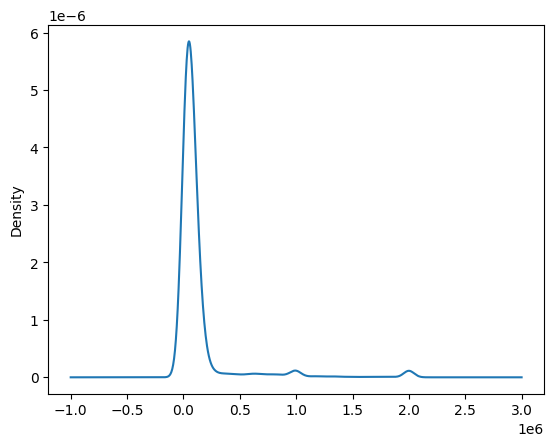

In [4]:
# your code goes here
df['ConvertedComp'].plot(kind='kde')

<Axes: xlabel='ConvertedComp', ylabel='Density'>

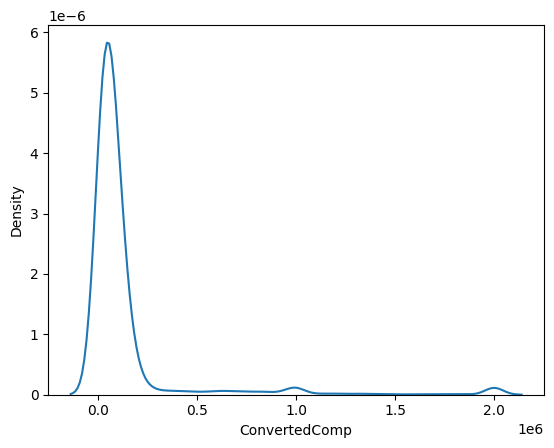

In [5]:
sns.kdeplot(df['ConvertedComp'])

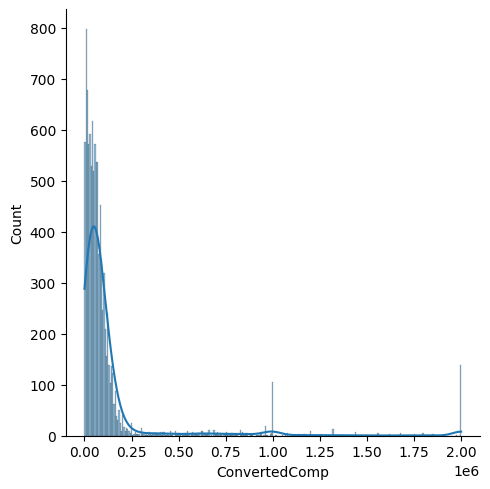

In [6]:
sns.displot(df['ConvertedComp'], kde=True)

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

Plot the histogram for the column `ConvertedComp`.


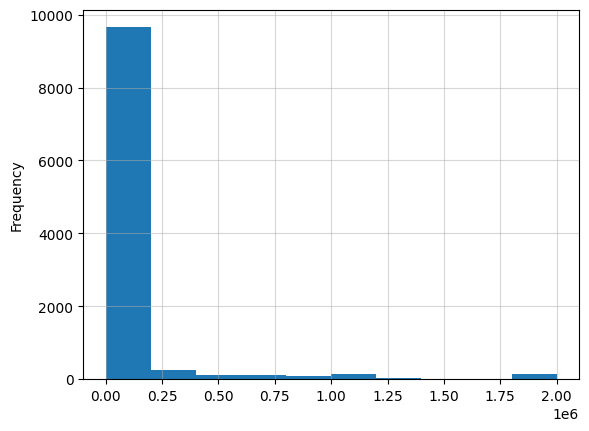

In [7]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')
plt.grid(alpha=0.5)

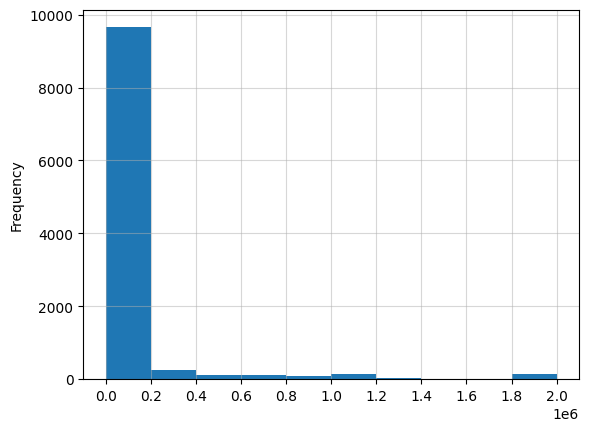

In [8]:
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
df['ConvertedComp'].plot(kind='hist', xticks= bin_edges)
plt.grid(alpha=0.5)

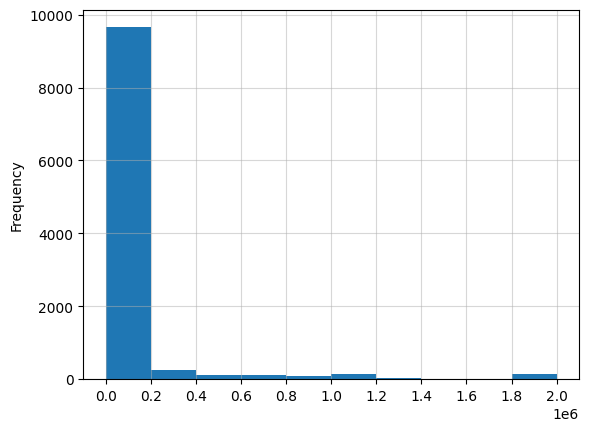

In [9]:
df['ConvertedComp'].plot.hist()
plt.xticks(bin_edges)
plt.grid(alpha=0.5)
plt.show()

<Axes: ylabel='Frequency'>

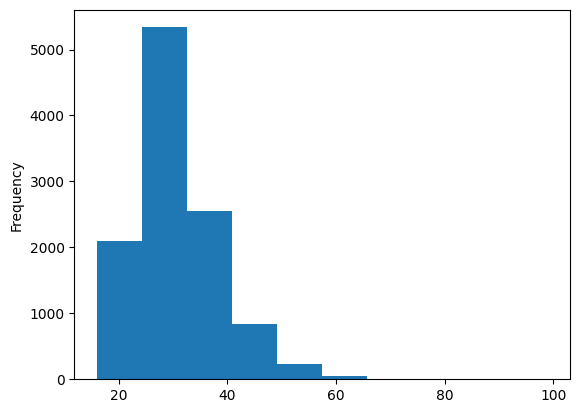

In [10]:
df['Age'].plot.hist()

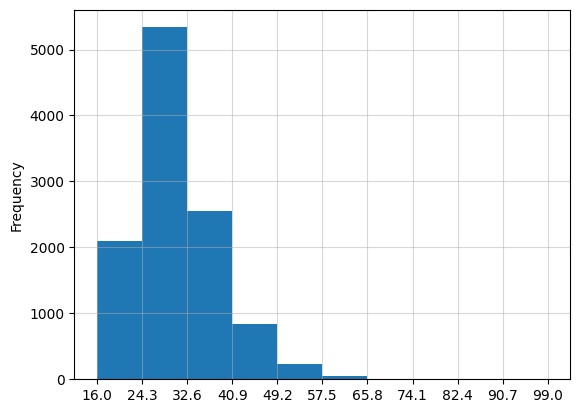

In [11]:
count, bin_edges = np.histogram(df['Age'].dropna())
df['Age'].plot(kind='hist', xticks= bin_edges)
plt.grid(alpha=0.5)

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df['ConvertedComp'].median()

np.float64(57745.0)

How many responders identified themselves only as a **Man**?


In [13]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [14]:
df[df['Gender']=='Man']['Gender'].count()

np.int64(10480)

In [15]:
df['Gender'].eq('Man').sum()

np.int64(10480)

In [16]:
df['Gender'].eq('Woman').sum()

np.int64(731)

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

np.float64(57708.0)

In [18]:
df[df['Gender'].eq('Woman')]['ConvertedComp'].median()

np.float64(57708.0)

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


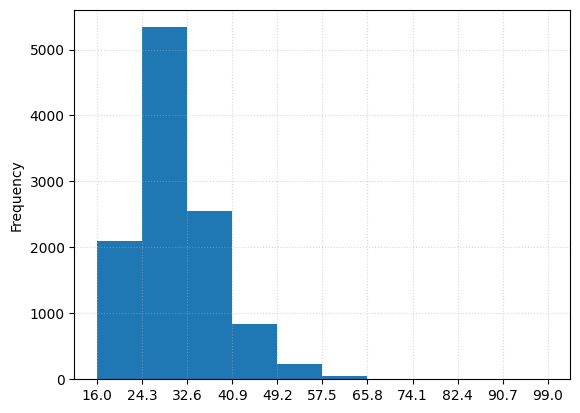

In [20]:
# your code goes here
age_count, age_bins = np.histogram(df['Age'].dropna())
df['Age'].plot(kind='hist', xticks=age_bins)
plt.grid(alpha=0.5, linestyle=':')

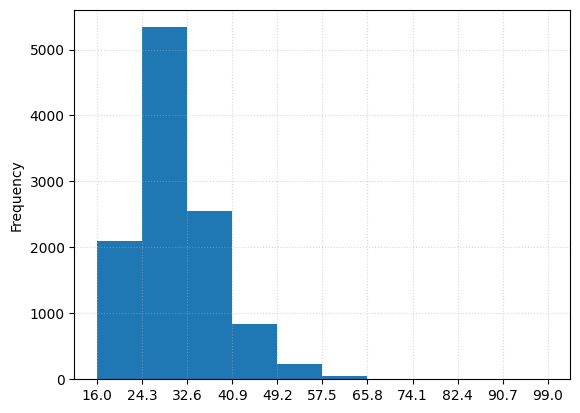

In [21]:
df['Age'].plot.hist()
plt.xticks(age_bins)
plt.grid(alpha=0.5, linestyle=':')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: >

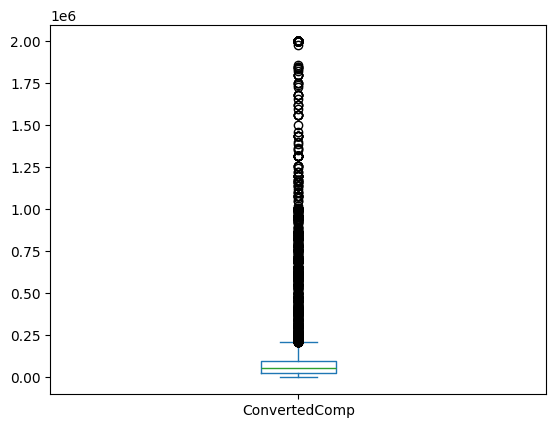

In [22]:
# your code goes here
df['ConvertedComp'].plot.box()

<Axes: >

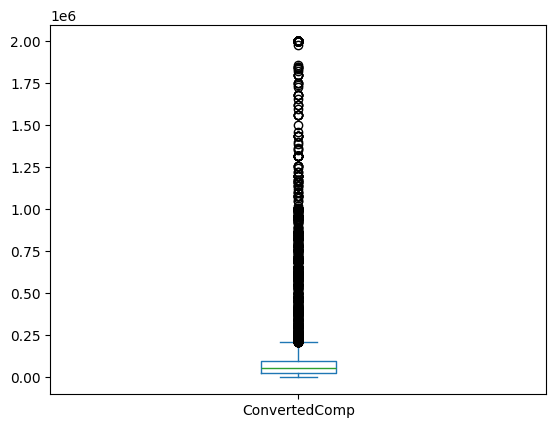

In [23]:
df.plot.box(column='ConvertedComp')

<Axes: xlabel='ConvertedComp'>

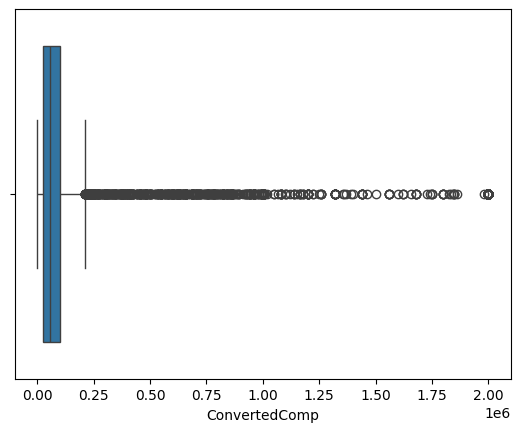

In [24]:
sns.boxplot(x='ConvertedComp', data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
cciqr = df['ConvertedComp'].describe()
cciqr

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [26]:
# your code goes here
iqr = cciqr[6] - cciqr[4]
iqr

C:\Users\Ahmed.IDEAPAD320\AppData\Local\Temp\ipykernel_2156\1734415235.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iqr = cciqr[6] - cciqr[4]


np.float64(73132.0)

Find out the upper and lower bounds.


In [27]:
# your code goes here
whiskers = iqr * 1.5
lower = cciqr[4] - whiskers
upper = cciqr[6] + whiskers
print(f'Upper bound is {upper}, lower bound is {lower}')


Upper bound is 209698.0, lower bound is -82830.0


C:\Users\Ahmed.IDEAPAD320\AppData\Local\Temp\ipykernel_2156\728712456.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower = cciqr[4] - whiskers
C:\Users\Ahmed.IDEAPAD320\AppData\Local\Temp\ipykernel_2156\728712456.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper = cciqr[6] + whiskers


Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
# your code goes here
df[(df['ConvertedComp'] > upper) | (df['ConvertedComp'] < lower)].shape[0]

879

In [29]:
df.shape[0]

11398

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [30]:
# your code goes here
new_df = df[(df['ConvertedComp']<= upper)]
new_df.shape[0]

9703

In [31]:
new_df['ConvertedComp'].median()

np.float64(52704.0)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [32]:
# your code goes here
new_df.corr(numeric_only=True)


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019354,0.010878,-0.016221,0.005293,0.002180
CompTotal,-0.019354,1.000000,-0.063561,0.004910,0.017007,0.006337
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.016221,0.004910,0.034351,1.000000,0.038935,0.032032
CodeRevHrs,0.005293,0.017007,-0.088934,0.038935,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


<Axes: ylabel='Age'>

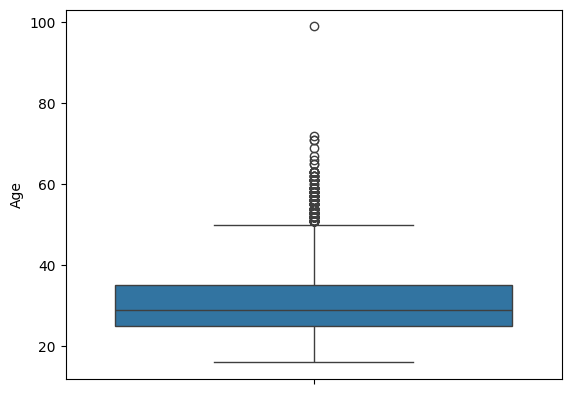

In [33]:
sns.boxplot(y='Age', data=df)

In [34]:
new_df['ConvertedComp'].mean()

np.float64(59883.20838915799)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
